In [35]:
## ------------------------- ##
##
## evaluate.py
## Basic image processing utilties.
## 
## runs on server shoot 
## ------------------------- ##

import numpy as np
import glob
from easydict import EasyDict #native python method
from matplotlib.pyplot import imread
import time

#Import student's method:
from sample_student import classify

program_start = time.time()

dataset_names = ['easy', 'medium_1', 'medium_2', 'hard']
weights = [0.5, 0.2, 0.2, 0.1]
classes = ['ball', 'brick', 'cylinder']
data_path = '../data' #Assuming data is one directory up. 

dataset_weights = {}
for i in range(len(dataset_names)):
    dataset_weights[dataset_names[i]] = weights[i]

#Store data performance data in a nested easydict:
performance = EasyDict()
total_time = 0

#Iterate through images:
for dataset_name in dataset_names:
    performance[dataset_name] = EasyDict()
    performance[dataset_name]['overall'] = np.array([0, 0]) #overall Correct/incorrect
    
    for image_class in classes:
        performance[dataset_name][image_class] = np.array([0, 0])
        image_paths = glob.glob(data_path + '/' 
                                + dataset_name + '/' 
                                + image_class + '/*.jpg')
        
        for image_path in image_paths:
            im = imread(image_path)
            
            start_time = time.time()
            prediction = classify(im)
            end_time = time.time()
            total_time += (end_time - start_time)
            
            if image_class == prediction:
                performance[dataset_name][image_class][0] += 1
            else:
                performance[dataset_name][image_class][1] += 1
                
        #Tally overall performance for class
        performance[dataset_name]['overall'] = performance[dataset_name]['overall'] \
                                               + performance[dataset_name][image_class]


#Print out errors: 
print('Fraction of Correct Predictions: ')
overall_accuracy = 0
for dataset_name in dataset_names:
    total_correct, total_incorrect = performance[dataset_name]['overall']
    total = total_correct + total_incorrect
    accuracy = np.round(float(total_correct)/total, 4)
    overall_accuracy += accuracy * dataset_weights[dataset_name]
    performance[dataset_name]['accuracy'] = accuracy
    print(dataset_name + ': ' + \
           '(' + str(total_correct) + '/' + str(total) + ' = ' + \
           str(accuracy) + ')')
    
    for image_class in classes:
        print('   ' + image_class + ': '
              + str(performance[dataset_name][image_class][0])
              + '/'
              + str(np.sum(performance[dataset_name][image_class])))

overall_accuracy = np.round(overall_accuracy, 2)
score = 0

if overall_accuracy >= 0.6:
   score = 10
elif overall_accuracy >= 0.55:
   score = 9
elif overall_accuracy >= 0.5:
   score = 8
elif overall_accuracy >= 0.45:
   score = 7
elif overall_accuracy >= 0.4:
   score = 6
elif overall_accuracy >= 0.35:
   score = 5
elif overall_accuracy >= 0:
   score = 4


print("\nOverall Accuracy = ", overall_accuracy)
print("Score = ", score)

program_end = time.time()
complete_time = program_end - program_start
total_time =  round(total_time, 5)
complete_time = round(complete_time, 5)

print("Classification time (seconds): = ", total_time)
print("Program completetion time (seconds): = ", complete_time)

NameError: name 'figure' is not defined

Populating the interactive namespace from numpy and matplotlib


/home/nomdebrew/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


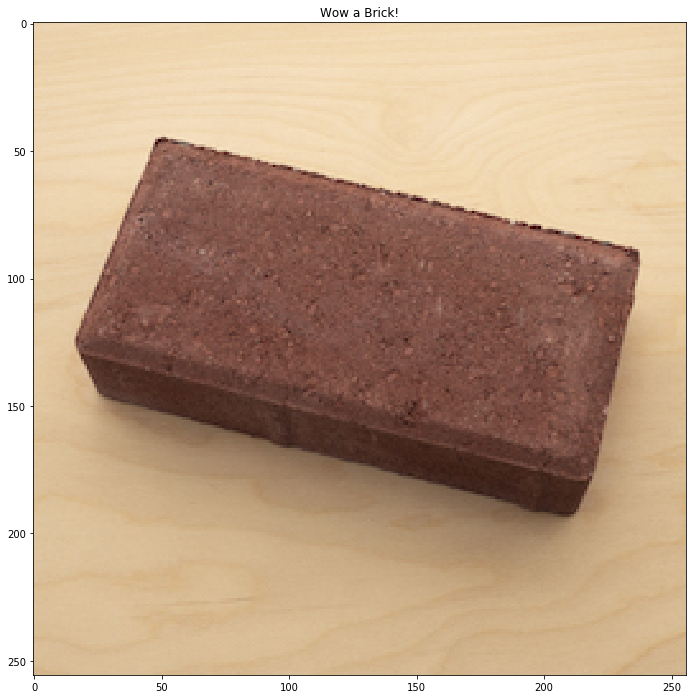

In [36]:
%pylab inline 
im = imread('../data/medium_1/brick/brick_1.jpg')
fig = figure(0, (12,12))
imshow(im); title('Wow a Brick!');

In [37]:
def convert_to_grayscale(im):
    '''
    Convert color image to grayscale.
    Args: im = (nxmx3) floating point color image scaled between 0 and 1
    Returns: (nxm) floating point grayscale image scaled between 0 and 1
    '''
    return np.mean(im, axis = 2)

In [51]:
kernel_size = 3
kernel = (1/kernel_size**2)*np.ones((kernel_size,kernel_size))
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [52]:
def reduce_noise(im, kernel):
    '''
    Filter an image by taking the dot product of each 
    image neighborhood with the kernel matrix.
    Args:
    im = (H x W) grayscale floating point image
    kernel = (M x N) matrix, smaller than im
    Returns: 
    (H-M+1 x W-N+1) filtered image.
    '''

    M = kernel.shape[0] 
    N = kernel.shape[1]
    H = im.shape[0]
    W = im.shape[1]
    
    filtered_image = np.zeros((H-M+1, W-N+1), dtype = 'float64')
    
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            image_patch = im[i:i+M, j:j+N]
            filtered_image[i, j] = np.sum(np.multiply(image_patch, kernel))
            
    return filtered_image

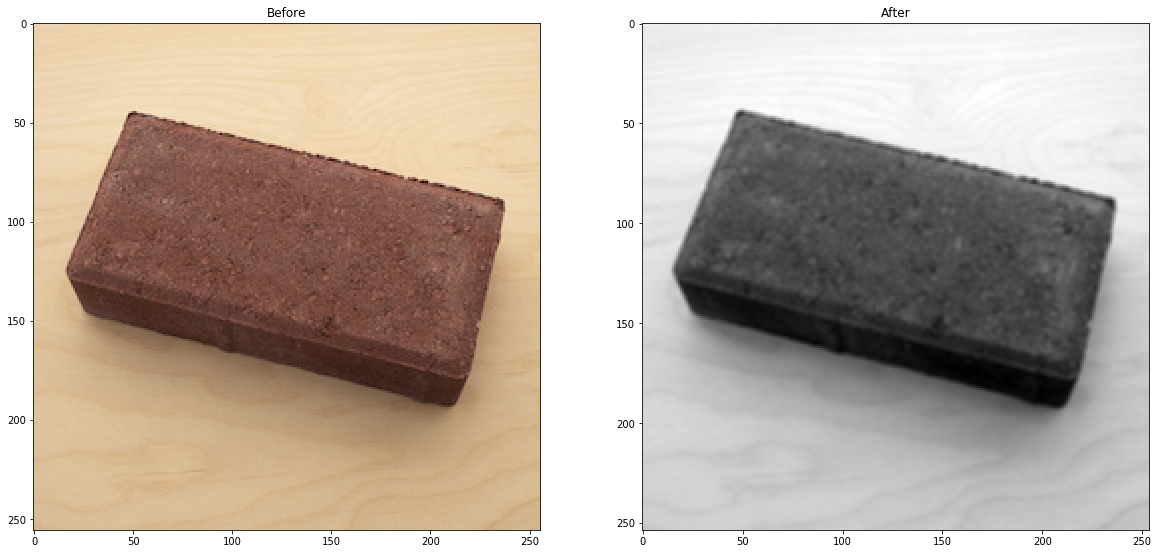

In [54]:
blured = reduce_noise(im, kernel)


fig = figure(0, (20,10))

fig.add_subplot(1,2,1)
imshow(im, cmap = 'gray');
title('Before');

fig.add_subplot(1,2,2)
imshow(blured, cmap = 'gray');
title('After');

In [48]:
# blur 
'''
def reduce_noise(im):
    blur = (im.shape[0]-2,im.shape[1]-2) #Our output will image will be two pixels smaller than our image

    for i in range(blur.shape[0]-2):
        for j in range(blur.shape[1]-2):
            blur[i,j]=(im[i,j]+im[i+1,j]+im[i+2,j]+
                      im[i,j+1]+im[i+1,j+1]+im[i+2,j+1]+
                      im[i,j+2]+im[i+1,j+2]+im[i+2,j+2])/9
    return blur
    
'''

SyntaxError: invalid syntax (<ipython-input-48-1d9b3087b9b6>, line 3)

In [43]:

reduce_noise(im)

AttributeError: 'tuple' object has no attribute 'shape'

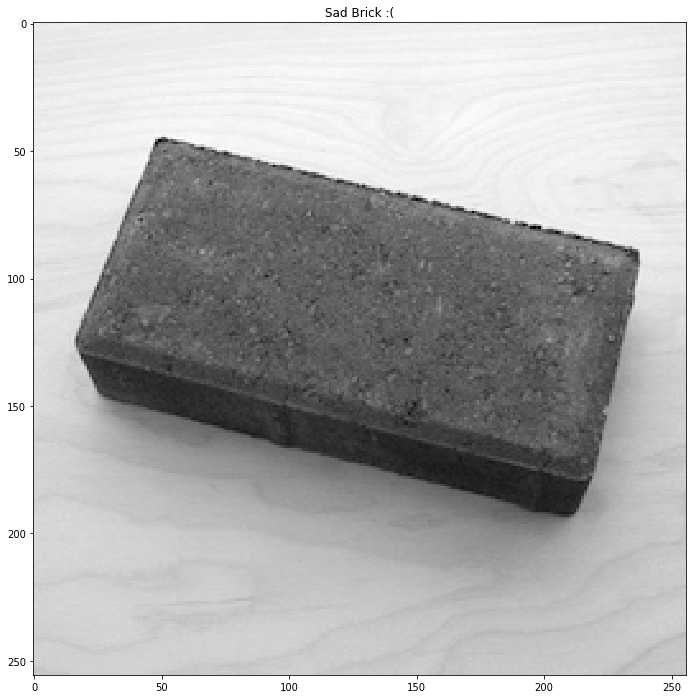

In [19]:
#We'll use Robert's notation, and call our grayscale image x
x = convert_to_grayscale(im)
fig = figure(0, (12,12))
imshow(x, cmap = 'gray'); title('Sad Brick :(');

In [20]:
x

array([[204.33333333, 204.33333333, 204.33333333, ..., 207.33333333,
        206.        , 206.        ],
       [206.        , 208.        , 207.66666667, ..., 206.33333333,
        206.33333333, 206.33333333],
       [209.        , 209.        , 208.33333333, ..., 210.66666667,
        210.        , 208.66666667],
       ...,
       [176.66666667, 177.        , 177.66666667, ..., 180.33333333,
        179.33333333, 179.33333333],
       [176.66666667, 175.66666667, 177.66666667, ..., 179.33333333,
        180.33333333, 179.33333333],
       [176.33333333, 179.66666667, 181.66666667, ..., 174.33333333,
        174.33333333, 176.66666667]])

In [21]:
def roberts_cross(x):
    '''
    Compute Robert's Cross of input image x.
    Args:
    x: (nxm) grayscale floating point image
    Returns:
    (n-1) x (m-1) edge image. 
    '''
    
    edges = np.zeros((x.shape[0]-1,x.shape[1]-1)) #Our output will image will be one pixel smaller than our image

    for i in range(x.shape[0]-1):
        for j in range(x.shape[1]-1):
            #Grab Appropriate (2x2) image patch
            image_patch = x[i:i+2, j:j+2]
            # Compute Robert's Cross for image patch
            edges[i, j] = np.sqrt((image_patch[0,0] - image_patch[1, 1])**2 + 
                                   (image_patch[1, 0] - image_patch[0, 1])**2)
            if edges[i, j] <=75:
                edges[i, j] = 0
            else:
                edges[i,j] =255
    return edges

In [22]:
edges = roberts_cross(x)

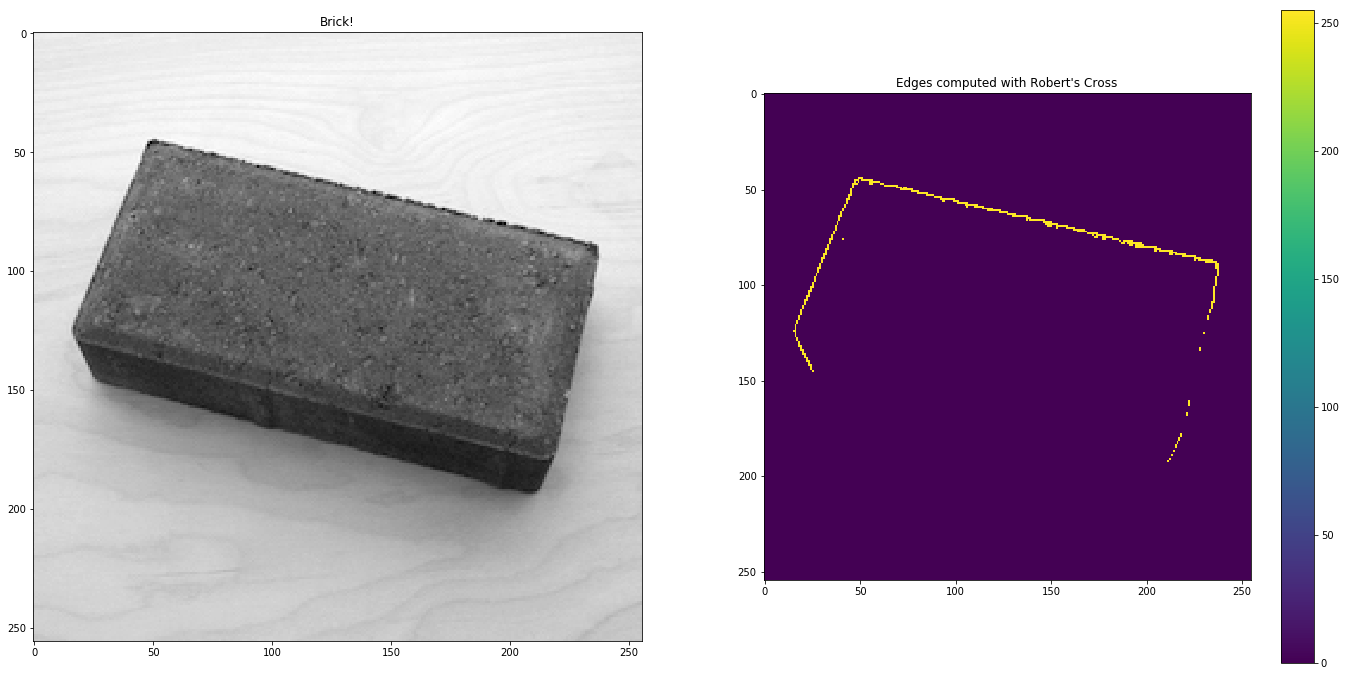

In [23]:
fig = figure(0, (24,12))
fig.add_subplot(1,2,1)
imshow(x, cmap = 'gray')
title('Brick!')

fig.add_subplot(1,2,2)
imshow(edges)
colorbar()
title("Edges computed with Robert's Cross");

In [24]:
def filter_2d(im, kernel):
    '''
    Filter an image by taking the dot product of each 
    image neighborhood with the kernel matrix.
    Args:
    im = (H x W) grayscale floating point image
    kernel = (M x N) matrix, smaller than im
    Returns: 
    (H-M+1 x W-N+1) filtered image.
    '''

    M = kernel.shape[0] 
    N = kernel.shape[1]
    H = im.shape[0]
    W = im.shape[1]
    
    filtered_image = np.zeros((H-M+1, W-N+1), dtype = 'float64')
    
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            image_patch = im[i:i+M, j:j+N]
            filtered_image[i, j] = np.sum(np.multiply(image_patch, kernel))
            
    return filtered_image

In [25]:
%pylab inline
import os, sys
sys.path.append('..')

#from util.filters import filter_2d
#from util.image import convert_to_grayscale

Populating the interactive namespace from numpy and matplotlib


In [26]:
#Implement Sobel kernels as numpy arrays
Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

In [27]:
#Import an image to work on.
im = imread('../data/medium_1/brick/brick_2.jpg')
#Normalize image values to be between 0 and 1, convert to grayscale
gray = convert_to_grayscale(im/255.) 

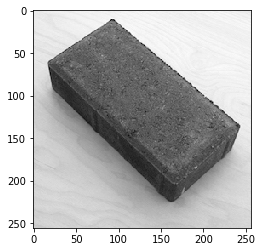

In [28]:
imshow(gray, cmap = 'gray');

In [29]:
Gx = filter_2d(gray, Kx)
Gy = filter_2d(gray, Ky)

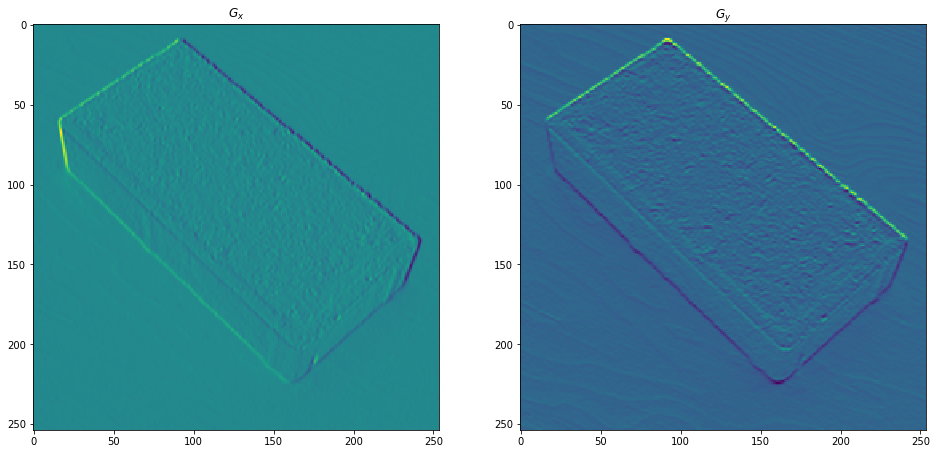

In [30]:
fig = figure(0, (16, 8))
fig.add_subplot(1,2,1)
imshow(Gx)
title('$G_x$');

fig.add_subplot(1,2,2)
imshow(Gy)
title('$G_y$');

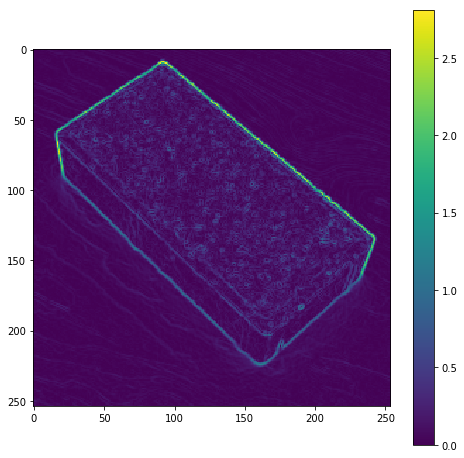

In [31]:
#Compute Gradient Magnitude:
G = np.sqrt(Gx**2+Gy**2)
fig = figure(0, (8,8))
imshow(G);
colorbar()

In [32]:
G

array([[0.01077936, 0.01333077, 0.03048864, ..., 0.01704367, 0.05254837,
        0.09929479],
       [0.00739458, 0.01407886, 0.01490425, ..., 0.05156362, 0.06018753,
        0.02155872],
       [0.01169186, 0.01857865, 0.01674019, ..., 0.03009376, 0.08254982,
        0.105113  ],
       ...,
       [0.05490196, 0.06472899, 0.09673203, ..., 0.0322852 , 0.02815772,
        0.0322852 ],
       [0.12649381, 0.11130318, 0.06512376, ..., 0.03164371, 0.03551131,
        0.02821834],
       [0.0672917 , 0.07209716, 0.05883805, ..., 0.01753779, 0.02041895,
        0.04467453]])

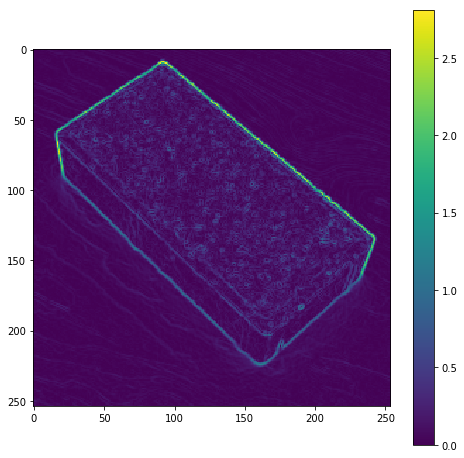

In [33]:
fig = figure(0, (8,8))
imshow(G);
colorbar()

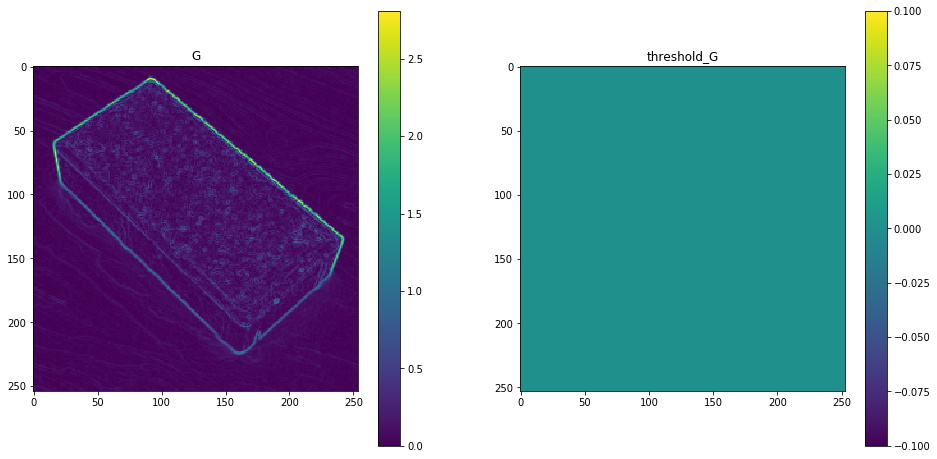

In [34]:
threshold_G = np.zeros((G.shape[0]-1,G.shape[1]-1))
fig = figure(0, (16, 8))
fig.add_subplot(1,2,1)
imshow(G)
title('G');
colorbar()

fig.add_subplot(1,2,2)
imshow(threshold_G)
title('threshold_G');
colorbar()

In [13]:
for i in range(threshold_G.shape[0]-1):
    for j in range(threshold_G.shape[1]-1):
        if threshold_G[i, j] <=1:
            threshold_G[i, j] = 0
        else:
            threshold_G[i,j] = 3.5

NameError: name 'threshold_G' is not defined

NameError: name 'G' is not defined

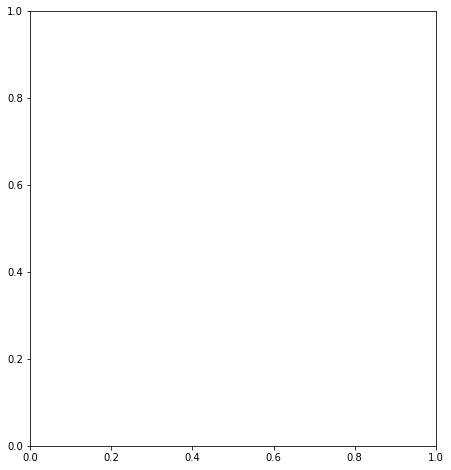

In [14]:
fig = figure(0, (16, 8))
fig.add_subplot(1,2,1)
imshow(G)
title('G');

fig.add_subplot(1,2,2)
imshow(threshold_G)
title('threshold_G');

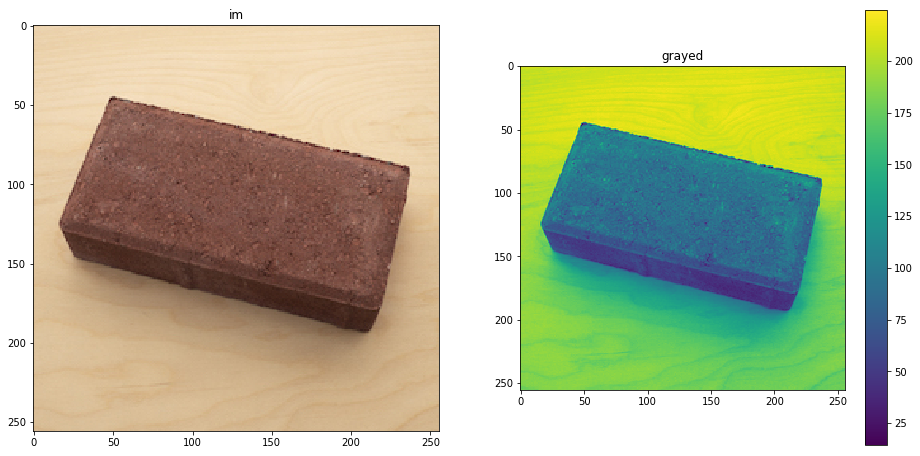

In [62]:
grayed = convert_to_grayscale(im)
fig = figure(0, (16, 8))
fig.add_subplot(1,2,1)
imshow(im)
title('im');

fig.add_subplot(1,2,2)
imshow(grayed)
title('grayed');
colorbar()

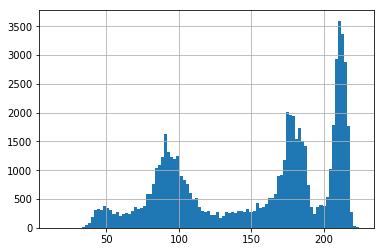

In [64]:
hist(grayed.ravel(), 100);
grid(1)

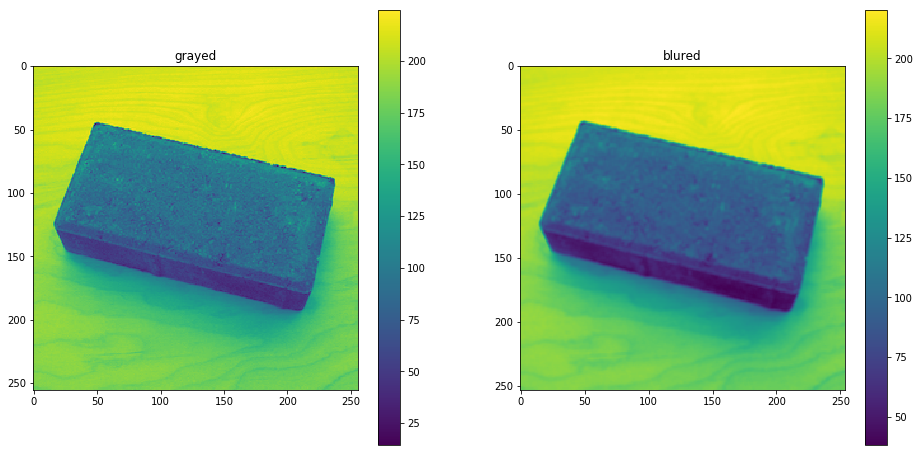

In [67]:
blured = reduce_noise(grayed, kernel)
fig = figure(0, (16, 8))
fig.add_subplot(1,2,1)
imshow(grayed)
title('grayed')
colorbar()

fig.add_subplot(1,2,2)
imshow(blured)
title('blured')
colorbar()

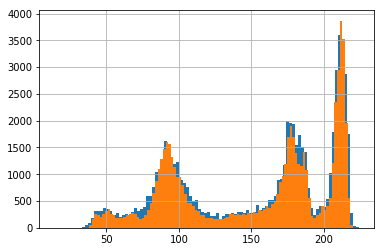

In [68]:
hist(grayed.ravel(), 100);
grid(1)
hist(blured.ravel(), 100);
grid(1)

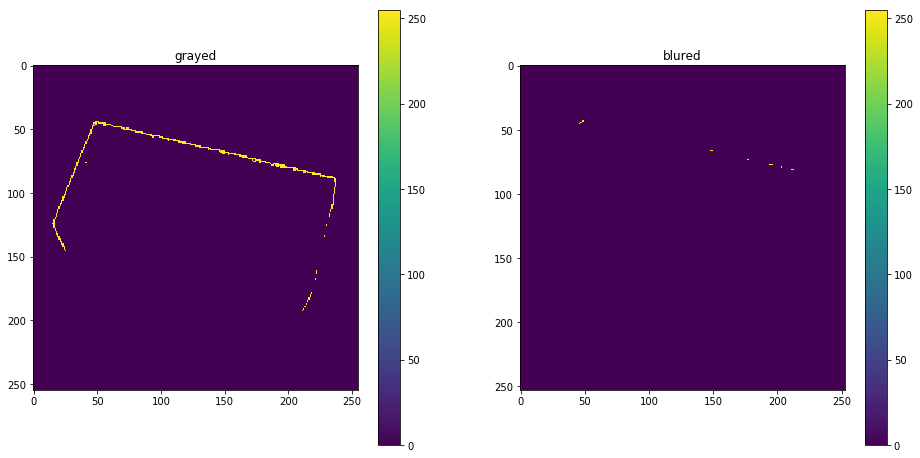

In [69]:
grayed_edges = roberts_cross(grayed)
blured_edges = roberts_cross(blured)
fig = figure(0, (16, 8))
fig.add_subplot(1,2,1)
imshow(grayed_edges)
title('grayed')
colorbar()

fig.add_subplot(1,2,2)
imshow(blured_edges)
title('blured')
colorbar()